In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("WDI_PCA_results.csv")
print(df.shape)
df.head()

(5771, 20)


,Country Name,Country Code,Year,BN.CAB.XOKA.GD.ZS,BX.KLT.DINV.WD.GD.ZS,FP.CPI.TOTL,GC.XPN.TOTL.GD.ZS,NE.EXP.GNFS.ZS,NE.IMP.GNFS.ZS,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SL.UEM.TOTL.ZS,SP.POP.TOTL,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,Afghanistan,AFG,2000,-2.35799,0.004828,63.523395,20.578174,10.420817,36.289077,3.521418e+09,174.930991,7.935,20130327.0,-0.840145,-1.001243,-0.153694,-0.032745,-0.166418,-0.149265,2
1,Afghanistan,AFG,2001,-2.35799,0.024169,63.523395,20.578174,10.420817,36.289077,2.813572e+09,138.706822,7.953,20284307.0,-0.840215,-1.002384,-0.151073,-0.031570,-0.166456,-0.149249,2
2,Afghanistan,AFG,2002,-2.35799,1.306950,63.523395,20.578174,10.420817,36.289077,3.825701e+09,178.954088,7.930,21378117.0,-0.836566,-0.997612,-0.155551,-0.029072,-0.137491,-0.163777,2
3,Afghanistan,AFG,2003,-2.35799,1.278493,63.523395,20.578174,10.420817,36.289077,4.520947e+09,198.871116,7.880,22733049.0,-0.838121,-0.995171,-0.160665,-0.033414,-0.137278,-0.164122,2
4,Afghanistan,AFG,2004,-2.35799,3.577104,63.523395,20.578174,10.420817,36.289077,5.224897e+09,221.763654,7.899,23560654.0,-0.830373,-0.989897,-0.161813,-0.024175,-0.086532,-0.189363,2


In [3]:
indicators = [
    "NY.GDP.MKTP.CD",       # GDP (current US$)
    "SP.POP.TOTL",          # Population
    "NY.GDP.PCAP.CD",       # GDP per capita (current US$)
    "FP.CPI.TOTL",          # Inflation, consumer prices
    "SL.UEM.TOTL.ZS",       # Unemployment rate
    "NE.EXP.GNFS.ZS",       # Exports of goods and services (% of GDP)
    "NE.IMP.GNFS.ZS",       # Imports of goods and services (% of GDP)
    "GC.XPN.TOTL.GD.ZS",    # Expense (% of GDP)
    "BN.CAB.XOKA.GD.ZS",    # Current account balance (% of GDP)
    "BX.KLT.DINV.WD.GD.ZS"  # Foreign direct investment, net inflows (% of GDP)
]

In [4]:

pc_cols = [c for c in df.columns if c.startswith("PC")]

print("Input indicator columns:\n", indicators)
print("\nLatent variable columns (PCA):\n", pc_cols)

Input indicator columns:
 ['NY.GDP.MKTP.CD', 'SP.POP.TOTL', 'NY.GDP.PCAP.CD', 'FP.CPI.TOTL', 'SL.UEM.TOTL.ZS', 'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'GC.XPN.TOTL.GD.ZS', 'BN.CAB.XOKA.GD.ZS', 'BX.KLT.DINV.WD.GD.ZS']

Latent variable columns (PCA):
 ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [5]:
# SUMMARY TABLE: Input → Latent Variables → Output

summary = pd.DataFrame({
    "Stage": ["Inputs", "Latent Variables", "Outputs"],
    "Description": [
        "Raw socio-economic indicators (GDP, population, inflation, trade, etc.)",
        "Principal components summarizing hidden development patterns (e.g. economic size, trade openness)",
        "Clusters of countries, income group classification (via SVM), and regression results (e.g. GDP per capita)"
    ],
    "Columns / Variables": [
        ", ".join(indicators),
        ", ".join(pc_cols),
        "Cluster, Income Group (after merge), Predicted GDP per capita"
    ]
})

summary


,Stage,Description,Columns / Variables
0,Inputs,"Raw socio-economic indicators (GDP, population...","NY.GDP.MKTP.CD, SP.POP.TOTL, NY.GDP.PCAP.CD, F..."
1,Latent Variables,Principal components summarizing hidden develo...,"PC1, PC2, PC3, PC4, PC5, PC6"
2,Outputs,"Clusters of countries, income group classifica...","Cluster, Income Group (after merge), Predicted..."


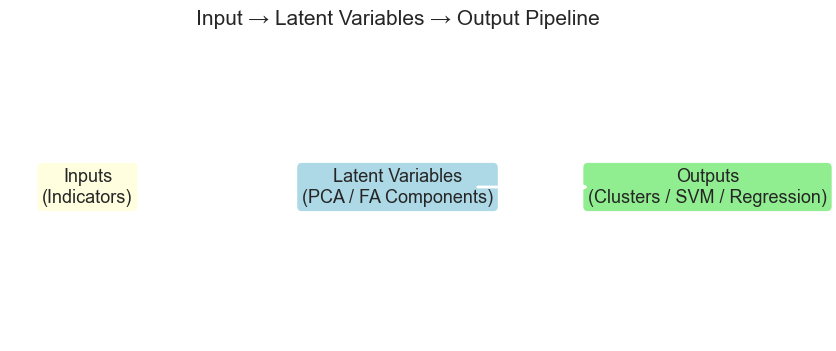

In [39]:
plt.figure(figsize=(10, 4))

plt.text(0.1, 0.5, "Inputs\n(Indicators)", fontsize=13, ha='center', va='center',
         bbox=dict(boxstyle="round", fc="lightyellow"))
plt.text(0.5, 0.5, "Latent Variables\n(PCA / FA Components)", fontsize=13, ha='center', va='center',
         bbox=dict(boxstyle="round", fc="lightblue"))
plt.text(0.9, 0.5, "Outputs\n(Clusters / SVM / Regression)", fontsize=13, ha='center', va='center',
         bbox=dict(boxstyle="round", fc="lightgreen"))

plt.annotate("", xy=(0.35, 0.5), xytext=(0.2, 0.5),
             arrowprops=dict(arrowstyle="->", lw=2))
plt.annotate("", xy=(0.75, 0.5), xytext=(0.6, 0.5),
             arrowprops=dict(arrowstyle="->", lw=2))

plt.axis("off")
plt.title("Input → Latent Variables → Output Pipeline", fontsize=15)
plt.show()

In [40]:
X = df[indicators].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled)

loadings = pd.DataFrame(
    pca.components_.T,
    index=indicators,
    columns=["PC1", "PC2", "PC3"]
)
loadings

,PC1,PC2,PC3
NY.GDP.MKTP.CD,-0.294336,0.616928,-0.168304
SP.POP.TOTL,-0.356836,0.524429,-0.271208
NY.GDP.PCAP.CD,0.271500,0.390872,0.389532
FP.CPI.TOTL,-0.053803,-0.002411,0.023126
SL.UEM.TOTL.ZS,0.134058,-0.139111,-0.574798
NE.EXP.GNFS.ZS,0.552887,0.226511,-0.125643
NE.IMP.GNFS.ZS,0.555523,0.126943,-0.226876
GC.XPN.TOTL.GD.ZS,0.228604,0.242479,-0.183022
BN.CAB.XOKA.GD.ZS,0.103724,0.200208,0.559013
BX.KLT.DINV.WD.GD.ZS,0.118946,0.077040,0.046962


## Loading Analysis (Component to meaning)

In [41]:
pc_interpret = pd.DataFrame({
    "Principal Component": ["PC1", "PC2", "PC3"],
    "Top Contributing Indicators": [
        ", ".join(loadings["PC1"].abs().sort_values(ascending=False).head(3).index),
        ", ".join(loadings["PC2"].abs().sort_values(ascending=False).head(3).index),
        ", ".join(loadings["PC3"].abs().sort_values(ascending=False).head(3).index),
    ],
    "Example Interpretation (edit in report)": [
        "Overall economic size / wealth",
        "Trade openness and external balance",
        "Investment / macro stability pattern"
    ]
})

pc_interpret

,Principal Component,Top Contributing Indicators,Example Interpretation (edit in report)
0,PC1,"NE.IMP.GNFS.ZS, NE.EXP.GNFS.ZS, SP.POP.TOTL",Overall economic size / wealth
1,PC2,"NY.GDP.MKTP.CD, SP.POP.TOTL, NY.GDP.PCAP.CD",Trade openness and external balance
2,PC3,"SL.UEM.TOTL.ZS, BN.CAB.XOKA.GD.ZS, NY.GDP.PCAP.CD",Investment / macro stability pattern


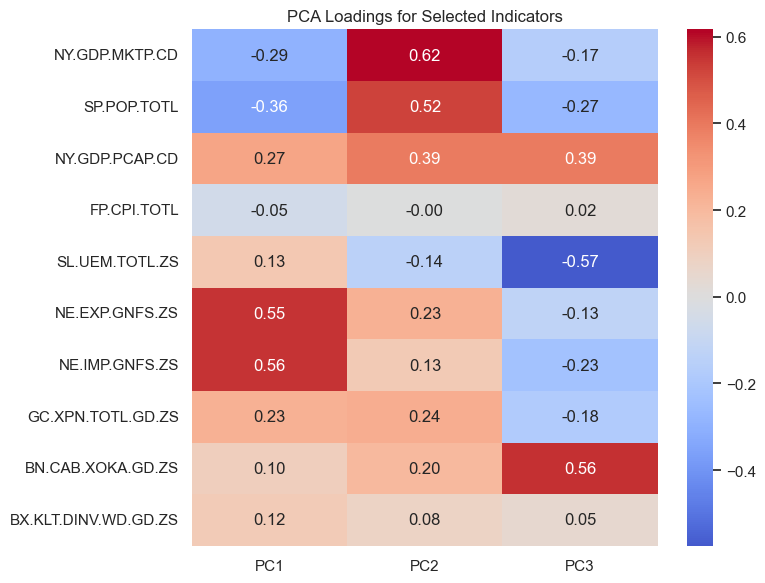

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(loadings, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("PCA Loadings for Selected Indicators")
plt.tight_layout()
plt.show()

In [43]:
if "Cluster" in df.columns:
    cluster_summary = df.groupby("Cluster")[indicators].mean()
    cluster_summary
else:
    print("No 'Cluster' column found. Make sure WDI_PCA_results.csv includes KMeans cluster labels.")

In [44]:
country_info = pd.read_csv(r"C:\Users\FORAM\OneDrive\Desktop\Multivariate A-1\MSM\WDI_CSV\WDICountry.csv")

country_info = country_info[["Country Code", "Short Name", "Region", "Income Group"]]

data_merged = df.merge(country_info, on="Country Code", how="left")

print("Before dropping missing income groups:", data_merged.shape)
data_merged = data_merged.dropna(subset=["Income Group"]).reset_index(drop=True)
print("After dropping missing income groups:", data_merged.shape)

data_merged[["Country Name", "Country Code", "Income Group"]].head()

Before dropping missing income groups: (5771, 20)
After dropping missing income groups: (4629, 20)


,Country Name,Country Code,Income Group
0,Afghanistan,AFG,Low income
1,Afghanistan,AFG,Low income
2,Afghanistan,AFG,Low income
3,Afghanistan,AFG,Low income
4,Afghanistan,AFG,Low income


In [45]:
print(df.columns)
print(country_info.columns)
data_merged[['Country Name','Country Code','Income Group']].head(70)

Index(['Country Name', 'Country Code', 'Year', 'BN.CAB.XOKA.GD.ZS',
       'BX.KLT.DINV.WD.GD.ZS', 'FP.CPI.TOTL', 'GC.XPN.TOTL.GD.ZS',
       'NE.EXP.GNFS.ZS', 'NE.IMP.GNFS.ZS', 'NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD',
       'SL.UEM.TOTL.ZS', 'SP.POP.TOTL', 'PC1', 'PC2', 'PC3', 'Cluster'],
      dtype='object')
Index(['Country Code', 'Short Name', 'Region', 'Income Group'], dtype='object')


,Country Name,Country Code,Income Group
0,Afghanistan,AFG,Low income
1,Afghanistan,AFG,Low income
2,Afghanistan,AFG,Low income
3,Afghanistan,AFG,Low income
4,Afghanistan,AFG,Low income
...,...,...,...
65,Algeria,DZA,Upper middle income
66,Algeria,DZA,Upper middle income
67,Algeria,DZA,Upper middle income
68,Algeria,DZA,Upper middle income


In [46]:
print(data_merged['Country Code'].nunique())
print(data_merged['Country Name'].unique()[:20])   # first 20 countries


207
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize']


In [ ]:
print("Unique income groups:", data_merged["Income Group"].unique())
print("Counts:\n", data_merged["Income Group"].value_counts())

Unique income groups: ['Low income' 'Upper middle income' 'High income' 'Lower middle income']
Counts:
 Income Group
High income            1726
Upper middle income    1231
Lower middle income    1150
Low income              522
Name: count, dtype: int64


Detected PCA columns: ['PC1', 'PC2', 'PC3']
=== SVM Classification Report (Income Group from PCA Latent Variables) ===
                     precision    recall  f1-score   support

        High income       0.83      0.85      0.84       432
         Low income       0.67      0.26      0.38       130
Lower middle income       0.51      0.42      0.46       288
Upper middle income       0.49      0.67      0.56       308

           accuracy                           0.63      1158
          macro avg       0.62      0.55      0.56      1158
       weighted avg       0.64      0.63      0.62      1158



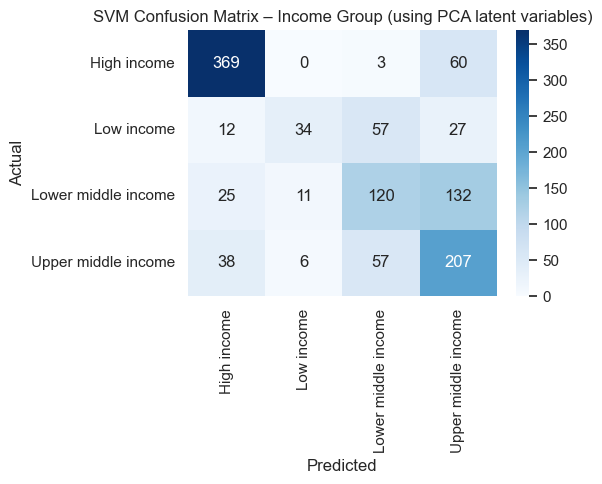

In [48]:
# %%
# === SVM Classification Using PCA Latent Variables ===

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# 1. Ensure PC columns exist
pc_cols = [c for c in data_merged.columns if c.startswith("PC")]
print("Detected PCA columns:", pc_cols)

if len(pc_cols) == 0:
    raise ValueError("No PCA columns found in data_merged. Make sure WDI_PCA_results.csv contains PC1, PC2, PC3.")

# 2. Select latent variables (PCA components)
X_latent = data_merged[pc_cols]

# 3. Target variable = Income Group
y = data_merged["Income Group"]

# 4. Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_latent, 
    y_encoded,
    test_size=0.25, 
    random_state=42, 
    stratify=y_encoded
)

# 6. Build and train SVM classifier
svm = SVC(kernel="rbf", gamma="scale", C=1)
svm.fit(X_train, y_train)

# 7. Predict on test set
y_pred = svm.predict(X_test)

# 8. Print classification report
print("=== SVM Classification Report (Income Group from PCA Latent Variables) ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 9. Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix – Income Group (using PCA latent variables)")
plt.tight_layout()
plt.show()


In [50]:
from sklearn.linear_model import LinearRegression

# Remove missing GDP per capita
reg_data = data_merged.dropna(subset=["NY.GDP.PCAP.CD"])
X_reg = reg_data[available_pcs]
y_reg = reg_data["NY.GDP.PCAP.CD"]

reg_model = LinearRegression()
reg_model.fit(X_reg, y_reg)

r2 = reg_model.score(X_reg, y_reg)
print(f"R² (PCs → GDP per capita): {r2:.3f}")

R² (PCs → GDP per capita): 0.676


 ## 10. Final Summary (for Report)
 
### From this notebook, you now have:
### - A clear **Input → Latent → Output** pipeline.
### - PCA loadings and an interpretation table for PC1–PC3.
### - Cluster summaries (to describe groups of similar countries).
### - SVM results showing how well latent variables predict income groups.
###  - Regression R² showing how well latent variables explain GDP per capita.